# RNA velocity

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
import anndata
import scvelo as scv

## Read Pan fetal metadata

In [2]:
pfi_obs = pd.read_csv("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.full_obs.csv", index_col=0)

## Load files

In [3]:
indir = '/nfs/team205/ed6/data/Fetal_immune/tic-908/'

In [4]:
infiles = pfi_obs.file.unique()

In [5]:
def convert_obs_name(obs_name):
    if "Human_colon" in obs_name:
        nn = obs_name.split(":")
        obs_name = nn[1].rstrip("x") + "-1_" + nn[0]
    else:
        obs_name = "-".join(obs_name.split(":")).rstrip("x")
    return(obs_name)

In [6]:
def read_velocyto(indir, file):
    adata = scv.read(indir + file + ".loom", cache=False)
    adata.obs_names = [convert_obs_name(x) for x in adata.obs_names]
    ## Check that all the cells from that file are in the adata
#     pfi_obs.index[pfi_obs.file == file].isin(adata)
    return(adata)

Merge all the files in one

In [ ]:
full_adata = read_velocyto(indir, infiles[0])
full_adata.var_names_make_unique()
del full_adata.layers["ambiguous"]
del full_adata.layers["matrix"]
for f in infiles[1:]:
    adata = read_velocyto(indir, f)
    adata.var_names_make_unique()
    adata = adata[adata.obs_names.isin(pfi_obs.index)]
    del adata.layers["ambiguous"]
    del adata.layers["matrix"]
    full_adata = full_adata.concatenate(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

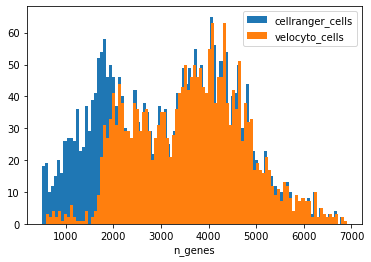

In [187]:
plt.hist(pfi_obs[pfi_obs.file=="FCAImmP7292028"].n_genes, bins=100, label="cellranger_cells");
plt.hist(pfi_obs.loc[adata.obs_names[adata.obs_names.isin(pfi_obs.index)]].n_genes, bins=100, label="velocyto_cells");
plt.xlabel("n_genes");
plt.legend()

In [33]:
import loompy

loompy.combine([indir + x for x in infiles], "/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.loom", key="Accession")

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/team205/ed6/data/Fetal_immune/tic-908/FCAImmP7179363'

In [167]:
ds = loompy.connect(indir + infiles[3])
# adata = scv.read(indir + infiles[3])

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [169]:
pfi_obs.loc[adata.obs_names]

KeyError: "None of [Index(['Human_colon_16S8159190:AACCGCGAGGACACCAx',\n       'Human_colon_16S8159190:AACTCTTAGACGCAACx',\n       'Human_colon_16S8159190:AAAGTAGTCACCGTAAx',\n       'Human_colon_16S8159190:AACACGTTCGCTTGTCx',\n       'Human_colon_16S8159190:AACTTTCGTCGCGTGTx',\n       'Human_colon_16S8159190:AAAGCAATCCTCGCATx',\n       'Human_colon_16S8159190:AAATGCCAGAAACCGCx',\n       'Human_colon_16S8159190:AACACGTAGAGCTGGTx',\n       'Human_colon_16S8159190:AACCGCGGTCTCATCCx',\n       'Human_colon_16S8159190:AACTGGTAGCGGCTTCx',\n       ...\n       'Human_colon_16S8159190:TTTGGTTGTAAGCACGx',\n       'Human_colon_16S8159190:TTTGGTTAGCTAACTCx',\n       'Human_colon_16S8159190:TTTGGTTTCTATCGCCx',\n       'Human_colon_16S8159190:TTGGCAATCTTGACGAx',\n       'Human_colon_16S8159190:TTTATGCCATGACGGAx',\n       'Human_colon_16S8159190:TTTGTCAAGCACACAGx',\n       'Human_colon_16S8159190:TTTGTCAGTCCGTTAAx',\n       'Human_colon_16S8159190:TTGTAGGCACGACGAAx',\n       'Human_colon_16S8159190:TTGGAACTCGGCTACGx',\n       'Human_colon_16S8159190:TTGGCAAAGTTGAGTAx'],\n      dtype='object', length=2747)] are in the [index]"

In [166]:
pfi_obs[pfi_obs.file=="Human_colon_16S8159190"]

,Sample,n_counts,n_genes,donor,organ,file,mito,doublet_scores,predicted_doublets,name,...,uniform_label,uniform_label_expanded_merged,uniform_label_lvl0,Sample.lanes,Sort_id,age,method,sex,Processing_method,AnnatomicalPart
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGATCTGAA-1_Human_colon_16S8159190,F73-FLI-0-SC-1,2209.0,1124,F73,GU,Human_colon_16S8159190,0.255772,0.058040,False,gut,...,TUFT,TUFT,EPI,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
AAACCTGAGCTAGTGG-1_Human_colon_16S8159190,F73-FLI-0-SC-1,4432.0,2045,F73,GU,Human_colon_16S8159190,0.079874,0.061947,False,gut,...,MYOFIBROBLAST,MYOFIBROBLAST,STROMAL,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
AAACCTGAGGCCCTTG-1_Human_colon_16S8159190,F73-FLI-0-SC-1,4421.0,1991,F73,GU,Human_colon_16S8159190,0.032798,0.004651,False,gut,...,GLIA,GLIA,GLIAL,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
AAACCTGAGGCGATAC-1_Human_colon_16S8159190,F73-FLI-0-SC-1,5321.0,2037,F73,GU,Human_colon_16S8159190,0.053185,0.044650,False,gut,...,MYOFIBROBLAST,MYOFIBROBLAST,STROMAL,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
AAACCTGAGGGCTTGA-1_Human_colon_16S8159190,F73-FLI-0-SC-1,4208.0,1767,F73,GU,Human_colon_16S8159190,0.057510,0.054378,False,gut,...,MYOFIBROBLAST,MYOFIBROBLAST,STROMAL,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCAGTTA-1_Human_colon_16S8159190,F73-FLI-0-SC-1,26155.0,5236,F73,GU,Human_colon_16S8159190,0.038042,0.220957,False,gut,...,NaN,NaN,NaN,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
TTTGTCAGTCCGTTAA-1_Human_colon_16S8159190,F73-FLI-0-SC-1,16571.0,3655,F73,GU,Human_colon_16S8159190,0.059984,0.113924,False,gut,...,ENTEROCYTE,ERYTHROID,EPI,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt
TTTGTCATCAACTCTT-1_Human_colon_16S8159190,F73-FLI-0-SC-1,13389.0,3303,F73,GU,Human_colon_16S8159190,0.055120,0.047702,False,gut,...,ENTEROCYTE,ERYTHROID,EPI,Human_colon_16S8159190,CD45P_CD45N,15,5GEX,female,Collagnase,LargeInt


In [164]:
ds

,,,,,,CellID,Human_colon_16S8159190:AACCGCGAGGACACCAx,Human_colon_16S8159190:AACTCTTAGACGCAACx,Human_colon_16S8159190:AAAGTAGTCACCGTAAx,Human_colon_16S8159190:AACACGTTCGCTTGTCx,Human_colon_16S8159190:AACTTTCGTCGCGTGTx,Human_colon_16S8159190:AAAGCAATCCTCGCATx,Human_colon_16S8159190:AAATGCCAGAAACCGCx,Human_colon_16S8159190:AACACGTAGAGCTGGTx,Human_colon_16S8159190:AACCGCGGTCTCATCCx,Human_colon_16S8159190:AACTGGTAGCGGCTTCx,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSG00000237613,1,36081,FAM138A,34554,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000238009,1,133723,RP11-34P13.7,89295,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000239945,1,91105,RP11-34P13.8,89551,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000239906,1,140339,RP11-34P13.14,139790,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000279457,1,200322,FO538757.2,184923,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000228463,1,297502,AP006222.2,257864,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000236743,1,359681,RP5-857K21.15,357383,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000237094,1,501617,RP4-669L17.10,365389,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSG00000278566,1,451678,OR4F29,450740,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [49]:
pd.Series(new_names).isin(pfi_obs.index)

0       True
1       True
2       True
3       True
4       True
        ... 
3858    True
3859    True
3860    True
3861    True
3862    True
Length: 3863, dtype: bool